In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import tests.lumfuncs as lf
import tests.lumfuncs_2 as lf2
from popsycle import ebf
from popsycle import synthetic

In [3]:
model_data = ebf.read('./data/lumfunc_test.ebf', '/')
model_data2 = pd.read_csv('./data/Huston2023_l0.250_b-2.150.csv')

In [4]:
distance = np.sqrt(model_data['px']**2 + model_data['py']**2 + model_data['pz']**2)

model_V = synthetic.calc_app_mag(distance, model_data['ubv_v'], model_data['exbv_schlegel'], 2.757)
model_I = synthetic.calc_app_mag(distance, model_data['ubv_i'], model_data['exbv_schlegel'], 1.496)
model_J = synthetic.calc_app_mag(distance, model_data['ubv_j'], model_data['exbv_schlegel'], 0.662)
model_H = synthetic.calc_app_mag(distance, model_data['ubv_h'], model_data['exbv_schlegel'], 0.344)

model_V = synthetic.calc_app_mag(distance, model_data['ubv_v'], model_data['exbv_schlegel'], 0)
model_I = synthetic.calc_app_mag(distance, model_data['ubv_i'], model_data['exbv_schlegel'], 0)
model_J = synthetic.calc_app_mag(distance, model_data['ubv_j'], model_data['exbv_schlegel'], 0)
model_H = synthetic.calc_app_mag(distance, model_data['ubv_h'], model_data['exbv_schlegel'], 0)

model_datasets = [{'V':model_V, 'I':model_I, 
                     'J':model_J, 'H':model_H}, 
                  
                  {'V':model_data2['WFC3_UVIS_F555W'], 'I':model_data2['WFC3_UVIS_F814W'], 
                     'J':model_data2['WFC3_IR_F110W'], 'H':model_data2['WFC3_IR_F160W']}
                 ]
model_area = [0.02, 0.002]
model_names = ['galaxia', 'synthpop']

In [5]:
lf?

Type:        module
String form: <module 'tests.lumfuncs' from '/System/Volumes/Data/mnt/g3/scratch/alexkim/code/galactic-model-tests/tests/lumfuncs.py'>
File:        /System/Volumes/Data/mnt/g3/scratch/alexkim/code/galactic-model-tests/tests/lumfuncs.py
Docstring:  
Module containing methods to test models against 
observed luminosity functions.
Current options are:
    compare_stanekwindow(model_data, model_area)

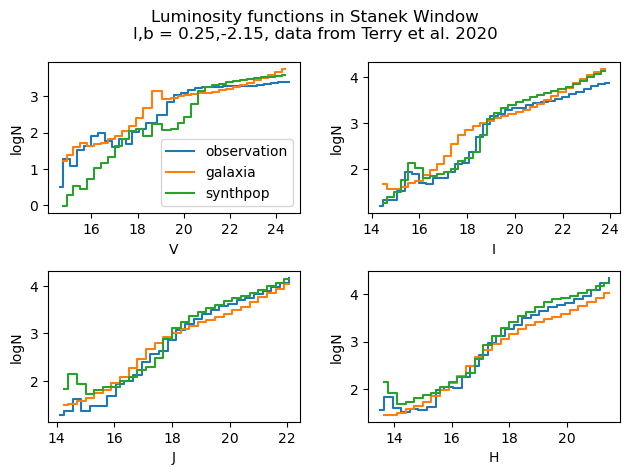

In [6]:
lf2.compare_stanekwindow(model_datasets, model_area, model_names)